In [1]:
#Binary Classification 
#Admitted vs Notadmitted

In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('/Users/arunramji/Downloads/machine-learning-ex2/ex2/ex2data1.txt'
                 ,sep = ","
                ,header = None)

In [4]:
df.columns = ['exam1','exam2','Admission']
df.head() 

,exam1,exam2,Admission
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [5]:
#assign variable
matrix = df.values
X = matrix[:,0:2]
y = matrix[:,2:]
print(X.shape)
print(y.shape)

(100, 2)
(100, 1)


In [6]:
#defining index fucnction
def intx(y,a):
    indices = [i for i,val in enumerate(y) if val==a ]
    return indices

In [7]:
#index of postive and negative classes
pos = intx(y,1)
neg = intx(y,0)

#number of positive classes from the dataset
len(pos)

60

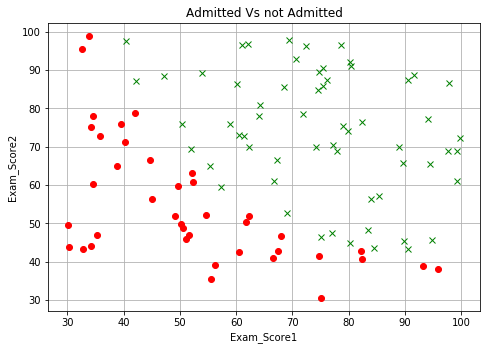

In [9]:
#plotting first two variable age and cigerPerDay against output classes
import matplotlib.pyplot as plt
fig = plt.figure()

ax = fig.add_axes([0,0,1,1])
ax.plot(X[pos,0],X[pos,1],'gx')
ax.plot(X[neg,0],X[neg,1],'ro')
ax.set_xlabel('Exam_Score1')
ax.set_ylabel('Exam_Score2')
ax.set_title('Admitted Vs not Admitted')
plt.grid()

In [10]:
#Add intercept term for X
m = len(X)
x = np.hstack([np.ones([m,1]),X])

#Initialising fitting parameter
init_theta = np.zeros([x.shape[1],1])

In [11]:
y.shape

(100, 1)

In [11]:
#Sigmoid function
def sigmoid(x):
    return 1/(1+(np.exp(-x)))

#define cost function
def cost(theta,x,y):
    m = len(x)
    J = (-1/m) * np.sum(np.multiply(y.T, np.log(sigmoid(x @ theta))) 
        + np.multiply((1-y.T), np.log(1 - sigmoid(x @ theta))))
    return J

#gradient term
def gradient(theta,x,y):
    m = len(x)
    h_of_x = sigmoid(x@theta)
    grad = 1 / m * (x.T @ (h_of_x - y))
    return grad

In [12]:
#cost
j = cost(init_theta,x,y)
j

69.31471805599453

In [13]:
#gradient
g = gradient(init_theta,x,y)
g

array([[ -0.1       ],
       [-12.00921659],
       [-11.26284221]])

In [14]:
#optimise theta 
from scipy import optimize as op

result = op.fmin_tnc(func=cost,
                     x0=init_theta.flatten(),
                     fprime=gradient,
                     args=(x,y.flatten()))

In [15]:
optimal_theta = result[0].reshape(3,1)
optimal_theta

array([[-25.16131869],
       [  0.20623159],
       [  0.20147149]])

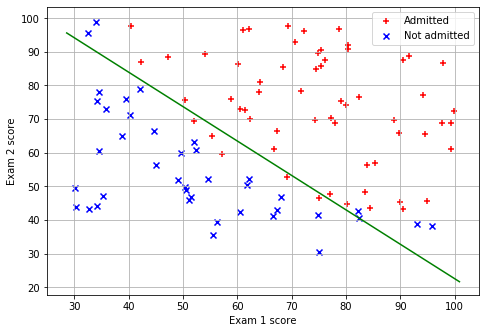

In [16]:
#plotting decision boundary
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

ax.scatter(X[pos,0],X[pos,1],c="r",marker="+",label="Admitted")
ax.scatter(X[neg,0],X[neg,1],c="b",marker="x",label="Not admitted")

#only need two points to define a line, so choose two points
x_value= np.array([np.min(X[:,1])-2,np.max(X[:,1])+2])

#calculate decision boundary line
y_value=-(optimal_theta[0] +optimal_theta[1]*x_value)/optimal_theta[2]

ax.plot(x_value,y_value, "g-")
ax.set_xlabel("Exam 1 score")
ax.set_ylabel("Exam 2 score")
plt.grid()
plt.legend()

In [17]:
x_test = np.array([45,85])
x_test = np.append(np.ones(1),x_test)
prob = sigmoid(x_test.dot(optimal_theta))
print("For a student with scores 45 and 85, we predict an admission probability of",prob[0])

For a student with scores 45 and 85, we predict an admission probability of 0.7762906242704579


In [18]:
p = sigmoid(x @ optimal_theta)>=0.5 ;

In [173]:
print('Model prediction accuracty against training set is :\n', np.mean(p == y)*100)

Model prediction accuracty against training set is :
 89.0
